# **What is an outlier?**

- To recap, an outlier is an observation that is far away from other data points. 
- If a house prices dataset has a median of 400,000 dollars, a house that costs five million dollars would likely be considered an outlier. 
- However, we should consider factors that affect price such as location, number of bedrooms, and overall size.

- An observation far away from other data points
  - Median house price: $400,000
  - Outlier house price: $5,000,000

- Should consider why the value is different:
  - Location, number of bedrooms, overall size etc

# **Using descriptive statistics**

- A starting place for identifying outliers is with the pandas dot-describe method. 
- We can see that the maximum salary is more than four times the mean and median. 
- Seems extreme right?

In [ ]:
print(salaries["Salary_USD"].describe())

In [ ]:
count      518.000
mean    104905.826
std      62660.107
min       3819.000
25%      61191.000
50%      95483.000
75%     137496.000
max     429675.000
Name: Salary_USD, dtype: float64

# **Using the interquartile range**

- We can define an outlier mathematically. 
- First, we need to know the interquartile range, or IQR, which is the difference between the 75th and 25th percentiles.

- IQR = 75th - 25th percentile

# **IQR in box plots**

- Recall that these percentiles are included in box plots, like this one showing salaries of data professionals. 
- The box contains percentiles, and observations considered to be outliers are represented as diamonds outside of the box.

In [ ]:
# Assuming 'salaries' is a pandas DataFrame with a column named 'Salary_USD'
sns.boxplot(data=salaries, y="Salary_USD")
plt.show()

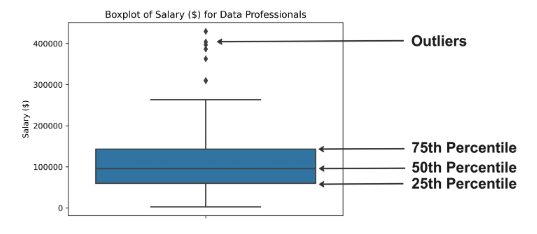

- Once we have the IQR, we can find an upper outlier by looking for values above the sum of the 75th percentile plus one-point-five times the IQR. 
- Lower outliers have values below the sum of the 25th percentile minus one-point-five times the IQR

- IQR = 75th - 25th percentile
- Upper Outliers > 75th percentile + (1.5 * IQR)
- Lower Outliers < 25th percentile - (1.5 * IQR)

# **Identifying thresholds**

- We can calculate percentiles using the Series-dot-quantile method. 
- We pass zero-point-seven-five to find the 75th percentile for salary, then pass zero-point-two-five to get the 25th percentile. 
- We calculate the IQR by subtracting one from the other. 
- Printing the result shows an IQR of around 76000 dollars.

In [ ]:
# 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

# 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth

print(salaries_iqr)

In [ ]:
76305.0

- We can plug these variables into our formulae to find the value thresholds, first for the upper limit and then for the lower limit. 
- Printing the results, we can see that the lower limit is actually below zero, which isn't possible given we are working with salaries!

In [ ]:
# Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

# Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

In [ ]:
251953.5 -53266.5

**Why Do We Add 1.5 * IQR?**

The 1.5 multiplier is a commonly used heuristic for identifying outliers. It is based on the assumption that data follows a roughly normal distribution, and it helps define a reasonable range for what should be considered "normal" data. Values beyond this range are seen as potential outliers.

Why 1.5?: The choice of 1.5 as the multiplier is a convention that works well in many practical situations. It has been shown to capture a reasonable number of outliers in a dataset without being too strict or too lenient. Increasing the multiplier (e.g., to 2.0) would result in fewer outliers, while decreasing it would identify more outliers.

# **Subsetting our data**

- We can find values outside of these limits by subsetting our data. 
- It will only return upper outliers, but for the purpose of demonstrating the syntax, we've also filtered for values below the lower threshold. 
- We also subset to just show Experience, Employee_Location, and Salary_USD. 
- There are nine individuals with a salary above the upper threshold. 
- Notice how none of them are entry level and they are all based in the US?

In [ ]:
# Filter salaries based on lower and upper bounds.
salaries[(salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper)] \ 
        [["Experience", "Employee_Location", "Salary_USD"]]

In [ ]:
       Experience  Employee_Location  Salary_USD
29     Mid         US                 429675.0
67     Mid         US                 257805.0
80     Senior      US                 263534.0
83     Mid         US                 429675.0
133    Mid         US                 403895.0
410    Executive   US                 309366.0
441    Senior      US                 362837.0
445    Senior      US                 386708.0
454    Senior      US                 254368.0

# **Why look for outliers?**

- So why is the detection of outliers an important part of exploratory data analysis? 
- These are extreme values and may not accurately represent the data. 
- Additionally, they can skew the mean and standard deviation. If we plan to perform statistical tests or build machine learning models, these will often require data that is normally distributed and not skewed!

- Outliers are extreme values
  - may not accurately represent our data

- Can change the mean and standard deviation

- Statistical tests and machine learning models need normally distributed data

# **What to do about outliers?**

- Once we know we have outliers, we need to decide what to do. 
- It's helpful to ask ourselves why these outliers exist. 
- For example, salaries can be very high depending on level of experience and the country of employment, so could be representative of a subset of our data. If this is the case, we could just leave them alone. 
- Alternatively, do we know the values are accurate? 
- Could there have been an error in data collection? 
- If there's an error, we could remove the values.

# **Dropping outliers**

- We can remove outliers by modifying the syntax we used to subset our data, filtering for values more than the lower limit and less than the upper limit. 
- Reprinting our descriptive statistics shows nine fewer values, a mean that is 5000 dollars less than before, and a much lower maximum salary!

In [ ]:
no_outliers = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)]
print(no_outliers["Salary_USD"].describe())

In [ ]:
count      509.000000
mean    100674.567780
std      53643.050057
min       3819.000000
25%      60928.000000
50%      95483.000000
75%     134059.000000
max     248257.000000
Name: Salary_USD, dtype: float64

**Distribution of salaries**

- To highlight the impact of removing outliers, let's plot a histogram of the original dataset containing the outliers. 
- We see the distribution is right-skewed by the upper outliers. 
- Plotting with the no_outliers dataset, salaries is now less skewed and looks more like a normal distribution!

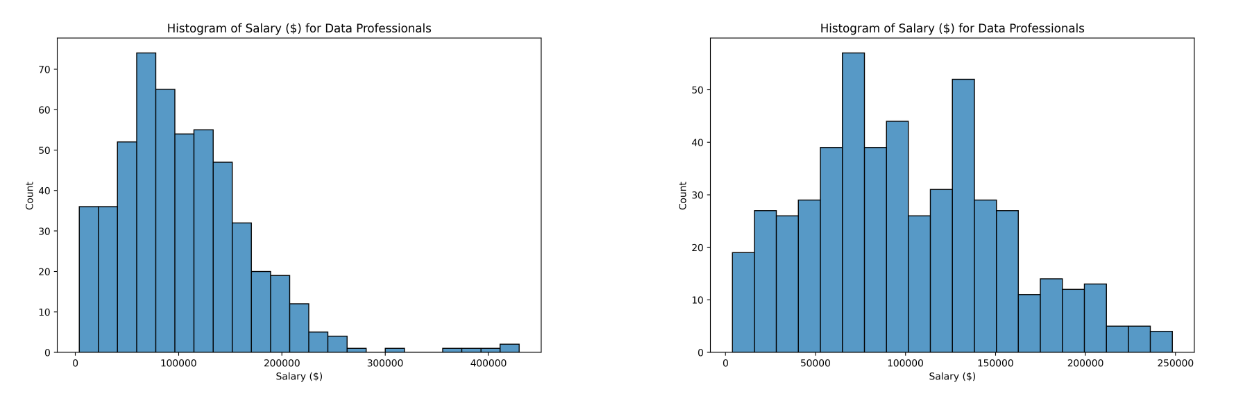